<a href="https://colab.research.google.com/github/abraham35/Credit-Risk-Prediction-Using-Deep-Learning/blob/main/creditrisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [54]:
from google.colab import files

uploaded = files.upload()

Saving credit_risk.csv to credit_risk (1).csv


In [57]:
df.dtypes

,0
Id,int64
Age,int64
Income,int64
Home,object
Emp_length,float64
Intent,object
Amount,int64
Rate,float64
Status,int64
Percent_income,float64


In [61]:
df1 = pd.read_csv('credit_risk.csv')

In [63]:
# Inspect the first few rows of the dataset
print(df1.head())


   Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0   22   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   

   Percent_income Default  Cred_length  
0            0.59       Y            3  
1            0.10       N            2  
2            0.57       N            3  
3            0.53       N            2  
4            0.55       Y            4  


In [65]:
# Step 3: Data Preprocessing
# Check for missing values
print("\nMissing values in the dataset:")
print(df1.isnull().sum())


Missing values in the dataset:
Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64


In [66]:
df= df.dropna()

# Check the result after dropping missing values
print("\nData after dropping rows with missing values:")
print(df_clean.isnull().sum())  # Verify that there are no more missing values


Data after dropping rows with missing values:
Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


In [67]:
# 2. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


In [68]:
# 3. Handle missing values and encode categorical features
# Separate features and target variable
X = df.drop('Default', axis=1)  # Features
y = df['Default'].map({'Yes': 1, 'No': 0})  # Target (binary encoded)

In [73]:
# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [74]:
X = df.drop('Default', axis=1)  # Features
y = df['Default'].map({'Yes': 1, 'No': 0})  # Target (binary encoded)

In [76]:
from sklearn.pipeline import Pipeline # Import the Pipeline class from sklearn.pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Impute numerical missing values with the mean
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_cols),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical missing values with the most frequent
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_cols)
    ])

In [77]:
# 4. Apply preprocessing and split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Apply transformations to training and testing sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [79]:
# 5. Build the deep learning model (Feedforward Neural Network)
model = Sequential()

In [80]:
# Input layer (the number of input neurons will be based on the processed features)
model.add(Dense(64, input_dim=X_train_processed.shape[1], activation='relu'))  # Hidden layer 1 with ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer 2 with ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid for binary classification


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
# 6. Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [82]:
# 7. Train the model
history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_test_processed, y_test))

Epoch 1/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: nan - v

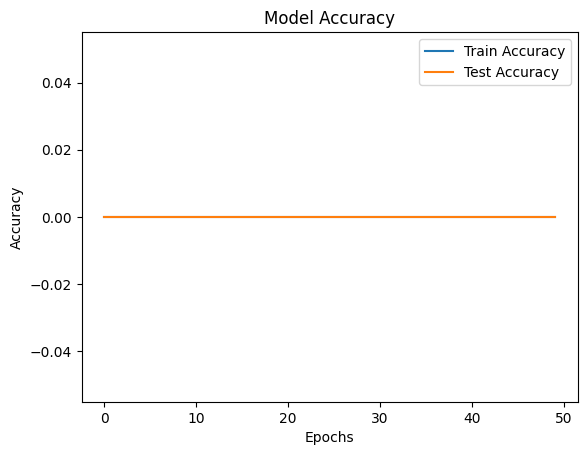

In [83]:
# You can also visualize the training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
# Check for missing or infinite values
print(df.isna().sum())  # Missing values
print((df == float('inf')).sum())  # Infinite values


Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64
Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


In [85]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))


In [86]:
df_scaled

array([[-1.73560439, -0.90759357, -0.12267385, ...,  1.90178819,
         3.95252678, -0.69179063],
       [-1.73549786, -1.06606387, -0.91490728, ..., -0.52582091,
        -0.65314095, -0.93941272],
       [-1.73539133, -0.43218267, -0.91490728, ...,  1.90178819,
         3.76454035, -0.69179063],
       ...,
       [ 1.7349127 ,  5.9066293 ,  0.14995709, ...,  1.90178819,
         2.73061494,  5.4987615 ],
       [ 1.73501923,  4.4803966 ,  1.33670353, ..., -0.52582091,
        -0.65314095,  5.00351733],
       [ 1.75643166,  6.06509959, -0.39530479, ..., -0.52582091,
        -0.18317486,  5.99400567]])

In [87]:
print(X_train.isnull().sum())  # Check for missing values in features
print(y_train.isnull().sum())  # Check for missing values in target


Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Cred_length       0
dtype: int64
22910


In [91]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
df['Default'] = label_encoder.fit_transform(df['Default'])  # Replace 'data' with 'df1' or the correct DataFrame variable

In [93]:
# One-hot encode categorical variables like 'Home' and 'Intent'
# Assuming 'df' contains the data you want to one-hot encode
df = pd.get_dummies(df, columns=['Home', 'Intent'], drop_first=True)

In [95]:
df = df.dropna()  # Replace 'data' with 'df' to drop missing values from the DataFrame 'df'

In [96]:
# **3. Split into features and target**
X = df.drop(columns=['Id', 'Default'])  # Drop the ID column and target column
y = df['Default']  # Target variable

In [97]:
# **4. Split data into training and testing sets**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# **5. Scale the features (important for deep learning)**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# **6. Build the Deep Learning model**
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),  # First hidden layer
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
# **7. Compile the model**
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
# **8. Train the model**
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7507 - loss: 0.5666 - val_accuracy: 0.8237 - val_loss: 0.4217
Epoch 2/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8240 - loss: 0.4324 - val_accuracy: 0.8221 - val_loss: 0.3676
Epoch 3/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8221 - loss: 0.3893 - val_accuracy: 0.8200 - val_loss: 0.3388
Epoch 4/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8189 - loss: 0.3652 - val_accuracy: 0.8226 - val_loss: 0.3226
Epoch 5/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8160 - loss: 0.3496 - val_accuracy: 0.8183 - val_loss: 0.3136
Epoch 6/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8237 - loss: 0.3365 - val_accuracy: 0.8179 - val_loss: 0.3074
Epoch 7/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8215 - loss: 0.3278 - val_accuracy: 0.8205 - val_loss: 0.3029
Epoch 8/50
716/716 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8223 - loss: 0.3217 - val_accuracy: 0.

In [102]:
# **9. Evaluate the model on the test set**
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8188 - loss: 0.2884
Test Accuracy: 81.98%


In [ ]:
# **10. Optionally, make predictions**
# predictions = model.predict(X_test_scaled)
# predictions = (predictions > 0.5).astype(int)  # Convert predictions to 0 or 1

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[4408  310]
 [ 722  288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4718
           1       0.48      0.29      0.36      1010

    accuracy                           0.82      5728
   macro avg       0.67      0.61      0.63      5728
weighted avg       0.79      0.82      0.80      5728

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


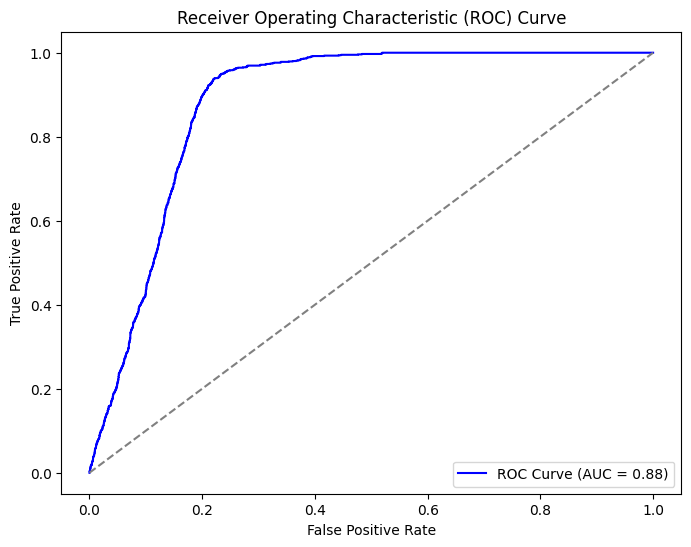

In [103]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# 1. Confusion Matrix
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)  # Predict binary values
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 2. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_scaled))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
